In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [77]:
df = pd.read_csv('train.csv')
df.head().T

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
Row#,104.000000,764.000000,621.000000,499.000000,439.000000
clonesize,12.500000,25.000000,25.000000,25.000000,12.500000
honeybee,0.250000,0.000000,0.500000,0.500000,0.250000
bumbles,0.250000,0.000000,0.250000,0.250000,0.380000
andrena,0.250000,0.000000,0.750000,0.380000,0.500000
osmia,0.750000,0.000000,0.630000,0.750000,0.750000
MaxOfUpperTRange,69.700000,86.000000,86.000000,69.700000,77.400000
MinOfUpperTRange,42.100000,52.000000,52.000000,42.100000,46.800000
AverageOfUpperTRange,58.200000,71.900000,71.900000,58.200000,64.700000


In [78]:
df.isna().sum()

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

Umumiy ma'lumotlar:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15 

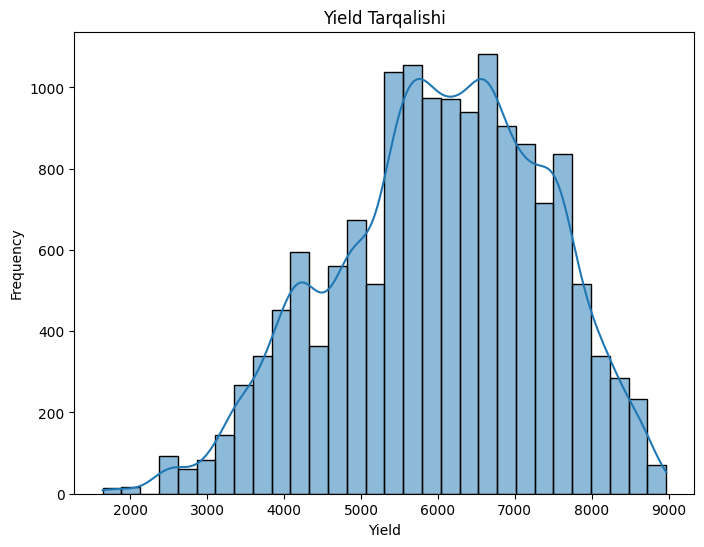

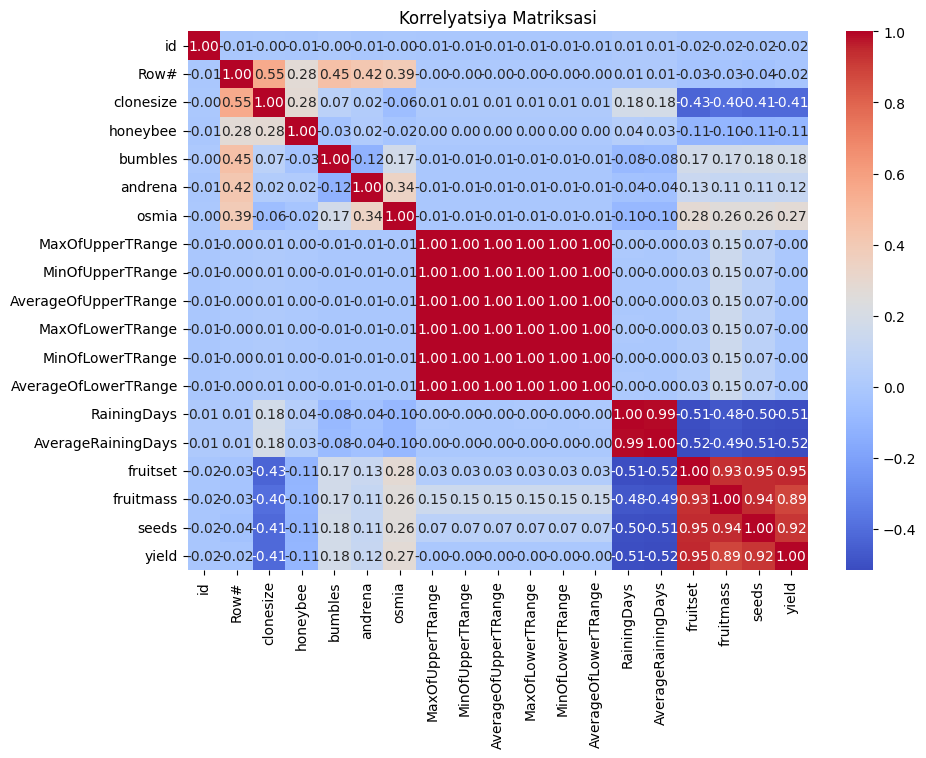

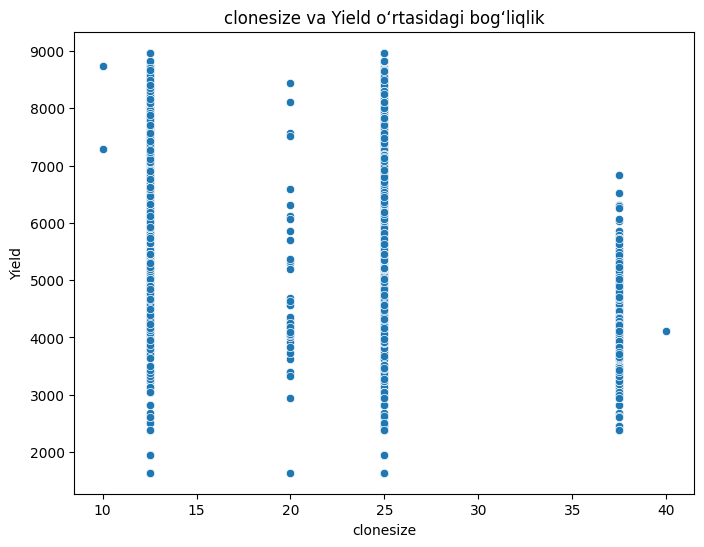

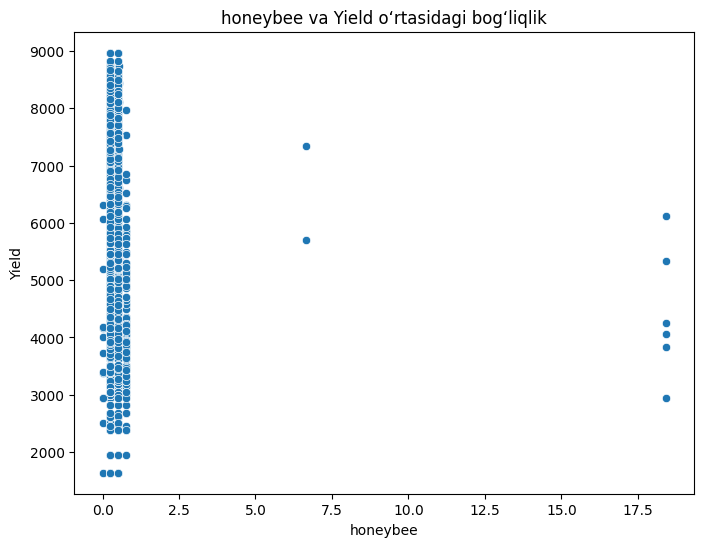

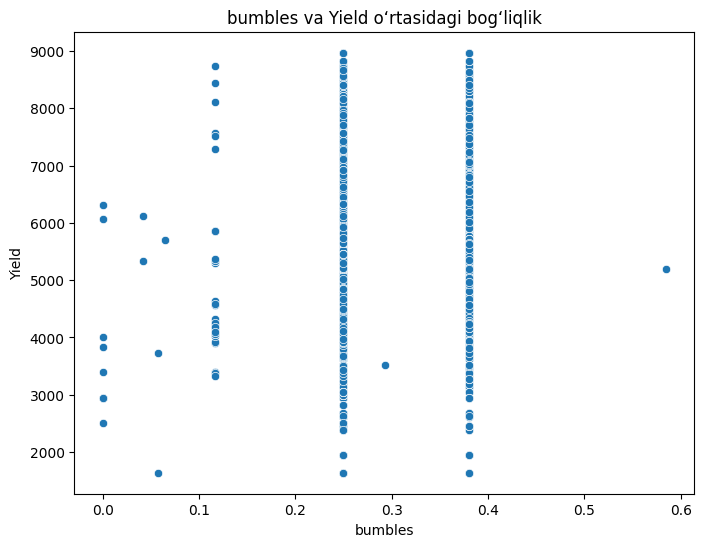

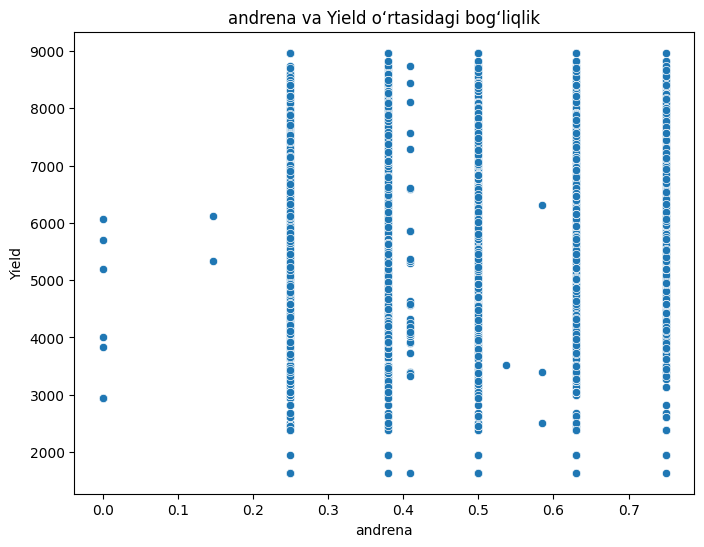

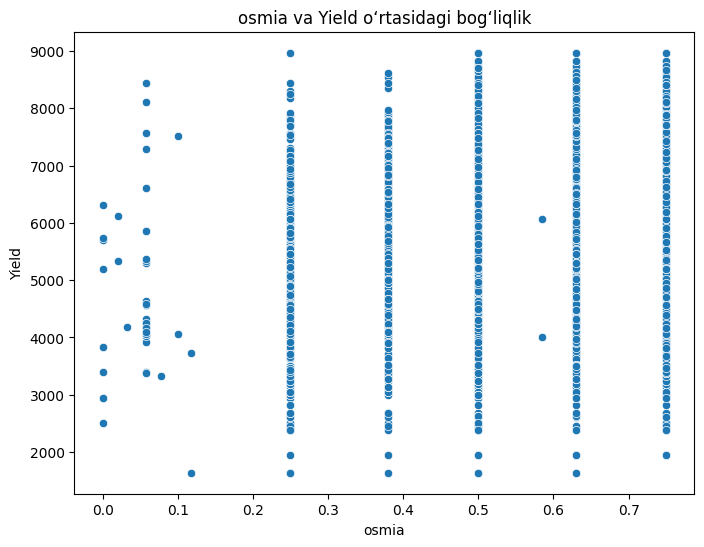

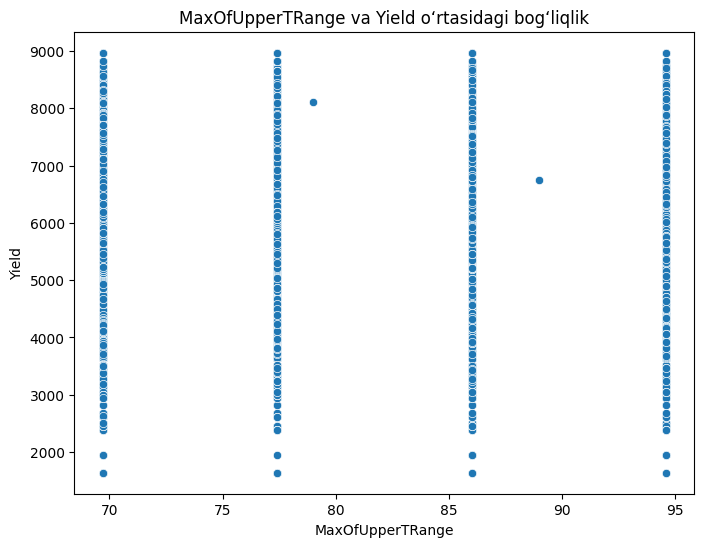

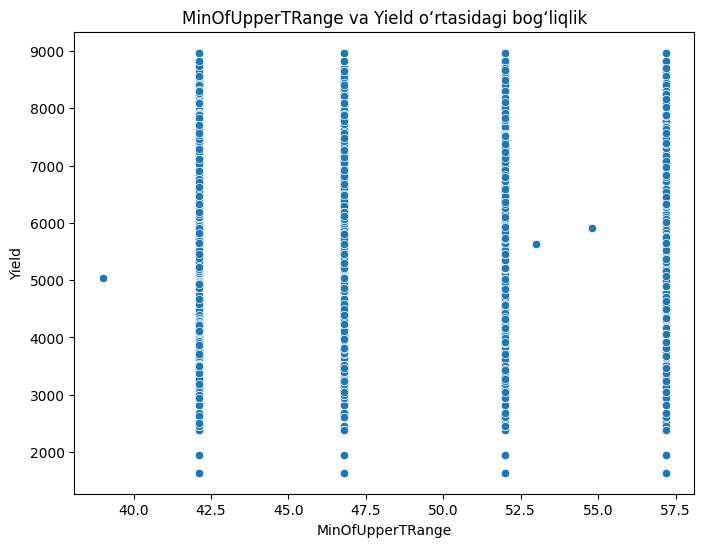

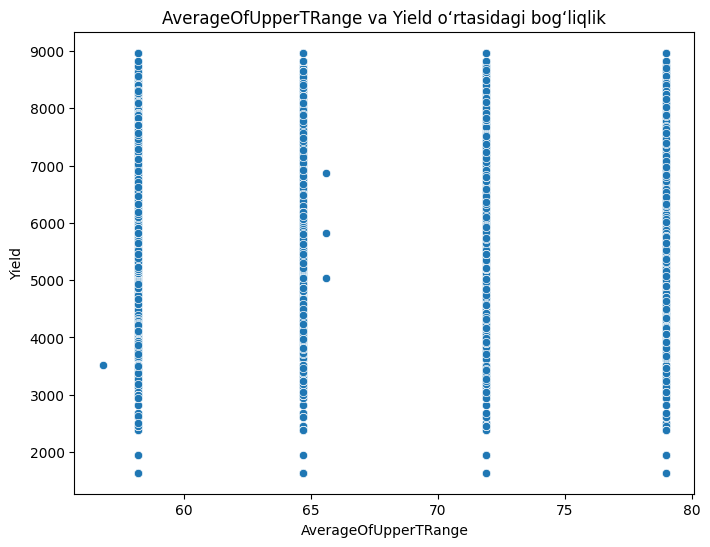

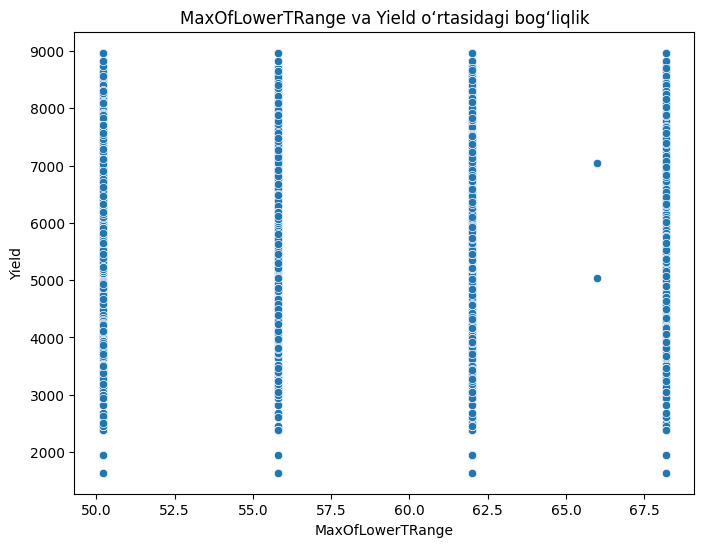

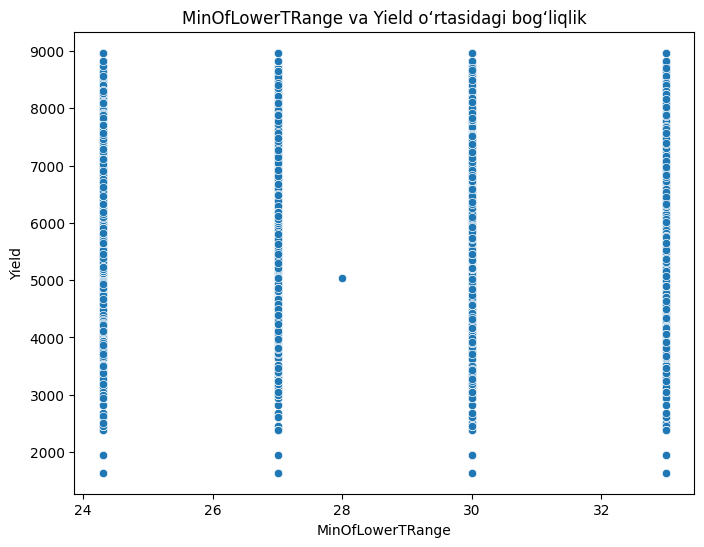

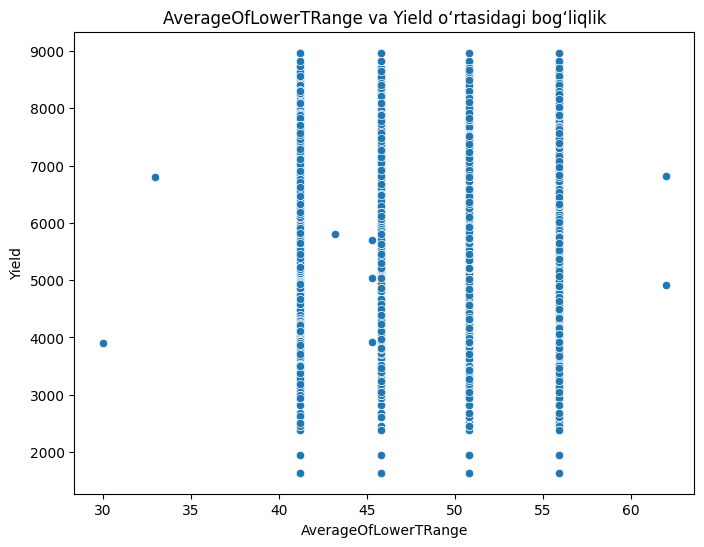

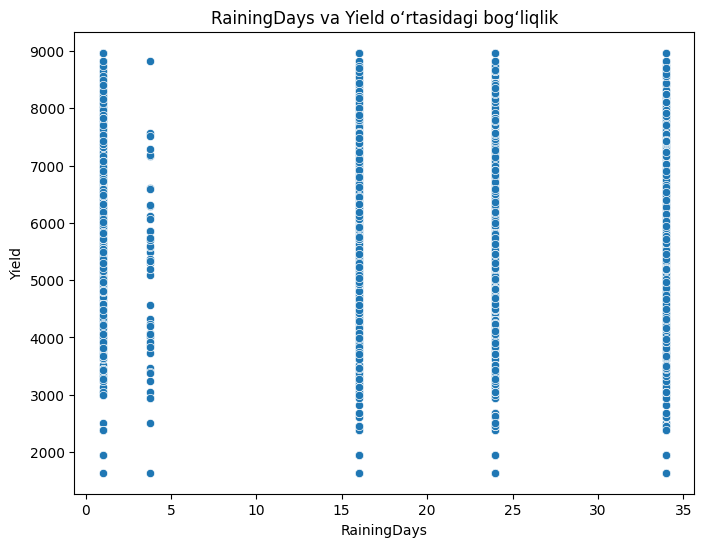

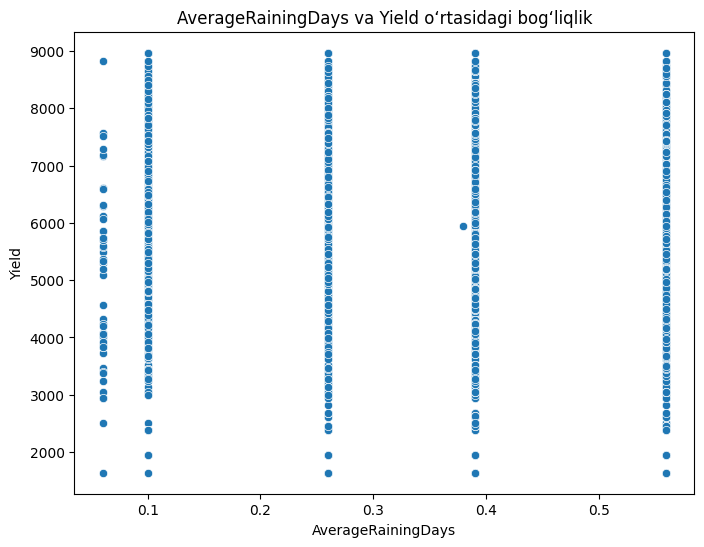

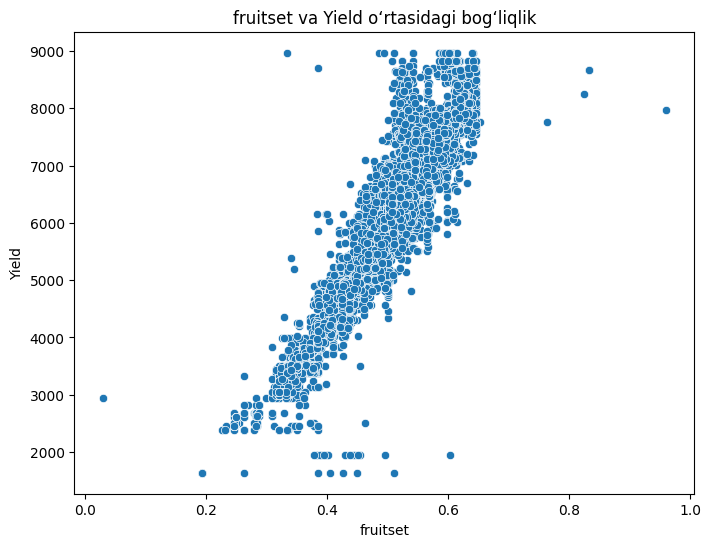

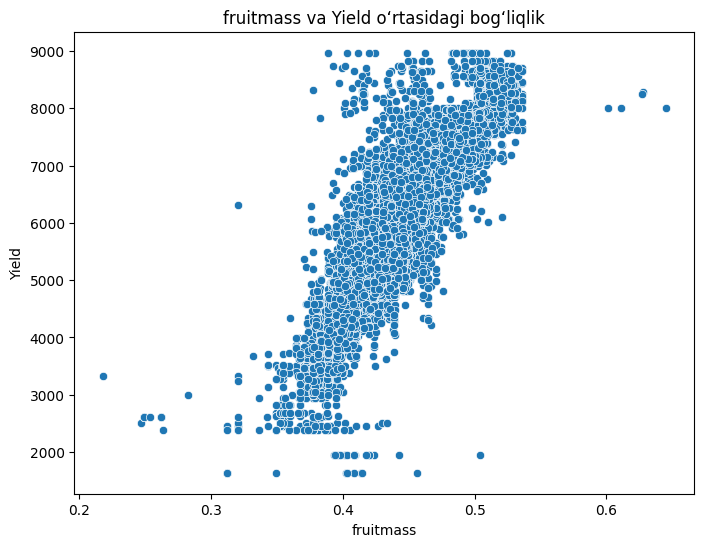

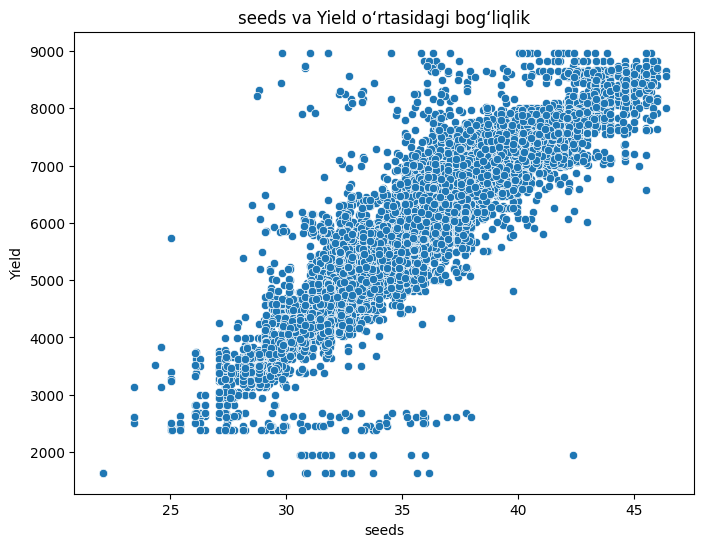

In [79]:
# 1. Ma'lumotlar haqida umumiy ko'rinish
print("Umumiy ma'lumotlar:")
print(df.info())
print("\nBir necha qator:")
print(df.head())

# 2. Statistik xulosa
print("\nStatistik xulosa:")
print(df.describe())

# 3. Har bir ustunning bo'sh qiymatlarini tekshirish
print("\nBo'sh qiymatlar:")
print(df.isnull().sum())

# 4. 'yield' ustunining tarqalishini ko'rish
plt.figure(figsize=(8, 6))
sns.histplot(df['yield'], kde=True, bins=30)
plt.title('Yield Tarqalishi')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()

# 5. Har bir ustunning 'yield' bilan korrelyatsiyasini aniqlash
correlation = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelyatsiya Matriksasi')
plt.show()

# 6. Yield bilan boshqa ustunlar orasidagi bog'liqlikni scatter plotlarda ko'rish
features = df.columns.drop(['yield', 'id', 'Row#'])  # 'yield', 'id', 'Row#' ni chiqarib tashlash
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['yield'])
    plt.title(f'{feature} va Yield o‘rtasidagi bog‘liqlik')
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.show()


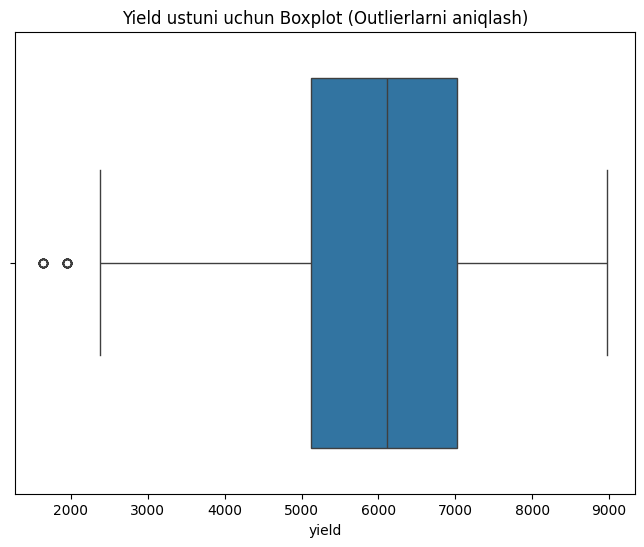

Yield bilan eng yuqori korrelyatsiyaga ega ustunlar:
yield                   1.000000
fruitset                0.950373
seeds                   0.919702
fruitmass               0.886668
AverageRainingDays      0.517130
RainingDays             0.506675
clonesize               0.414196
osmia                   0.271989
bumbles                 0.177281
andrena                 0.122463
honeybee                0.107869
Row#                    0.023540
id                      0.018685
MaxOfUpperTRange        0.004252
MinOfLowerTRange        0.004109
MaxOfLowerTRange        0.004082
MinOfUpperTRange        0.004008
AverageOfLowerTRange    0.003878
Name: yield, dtype: float64


In [80]:
# 1. Yield ustunida outlierlarni aniqlash uchun boxplot chizish
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['yield'])
plt.title("Yield ustuni uchun Boxplot (Outlierlarni aniqlash)")
plt.show()

# 2. Yield bilan eng yuqori korrelyatsiyaga ega bo'lgan ustunlarni tanlash
correlation = df.corr()
top_features = correlation['yield'].abs().sort_values(ascending=False).head(18)
print("Yield bilan eng yuqori korrelyatsiyaga ega ustunlar:")
print(top_features)

# Ushbu ustunlar bo'yicha qo'shimcha tahlillar o'tkazish mumkin


Yield bilan eng kuchli korrelyatsiyaga ega ustunlar:
 yield                   1.000000
fruitset                0.950373
seeds                   0.919702
fruitmass               0.886668
osmia                   0.271989
bumbles                 0.177281
andrena                 0.122463
AverageOfUpperTRange   -0.003666
AverageOfLowerTRange   -0.003878
MinOfUpperTRange       -0.004008
MaxOfLowerTRange       -0.004082
MinOfLowerTRange       -0.004109
MaxOfUpperTRange       -0.004252
id                     -0.018685
Row#                   -0.023540
honeybee               -0.107869
clonesize              -0.414196
RainingDays            -0.506675
AverageRainingDays     -0.517130
Name: yield, dtype: float64


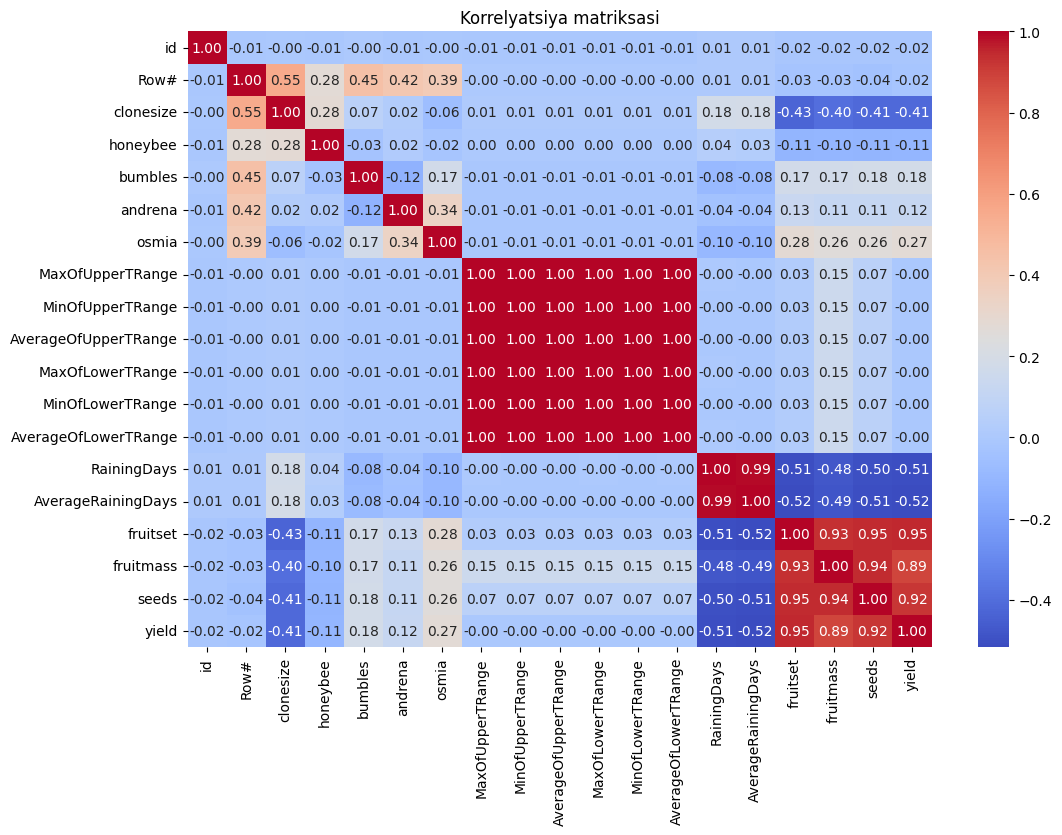

In [81]:
# Korrelyatsiya tahlili
correlation_ = df.corr()

# Faqat 'yield' bilan bog'liqliklarni ko'rish
yield_corr = correlation_['yield'].sort_values(ascending=False)
print("Yield bilan eng kuchli korrelyatsiyaga ega ustunlar:\n", yield_corr)

# Heatmapda ko'rsatish
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelyatsiya matriksasi")
plt.show()


In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standartlashtirish
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize']])

# Yangi DataFrame hosil qilish
df_scaled = pd.DataFrame(df_scaled, columns=['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize'])
df.isna().sum()


id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

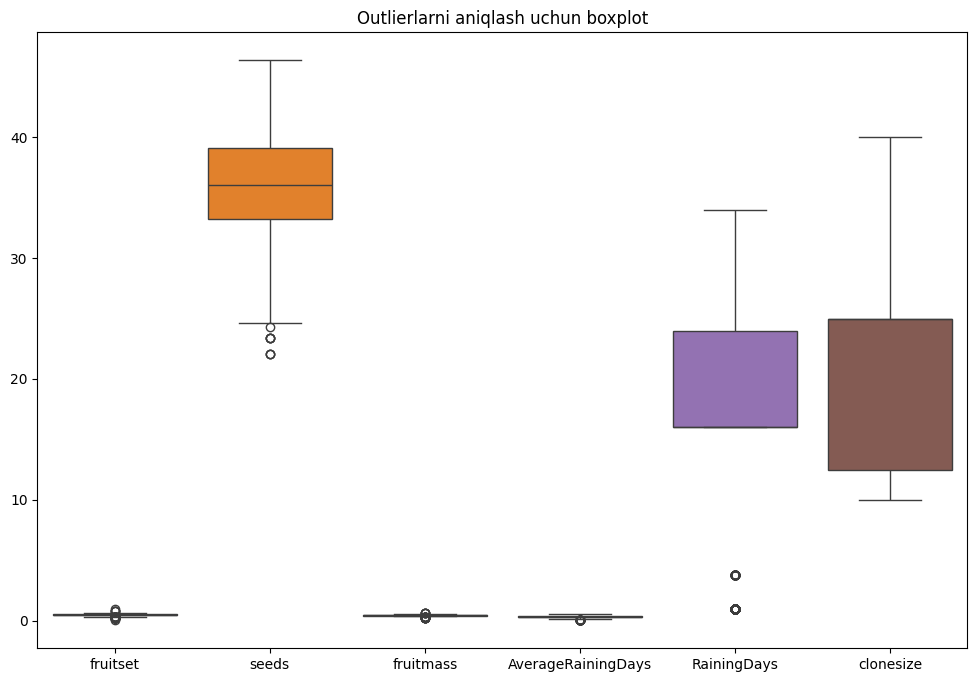

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Har bir xususiyat uchun boxplot chizish
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['fruitset', 'seeds', 'fruitmass', 'AverageRainingDays', 'RainingDays', 'clonesize']])
plt.title("Outlierlarni aniqlash uchun boxplot")
plt.show()
df.isna().sum()


In [84]:
# IQR orqali outlierlarni olib tashlash
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Outlier bo'lmagan qiymatlarni ajratib olish
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.isna().sum()


id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [85]:
# O‘zaro ta'sir terminlari yaratish
df['fruitset_fruitmass_interaction'] = df['fruitset'] * df['fruitmass']
df['raining_interaction'] = df['AverageRainingDays'] * df['RainingDays']



In [86]:
# Harorat diapazonlarini agregatsiya qilish
df['UpperTempRange_Avg'] = df[['MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange']].mean(axis=1)
df['LowerTempRange_Avg'] = df[['MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange']].mean(axis=1)


In [87]:
# Yangi xususiyatlar va yield orasidagi korrelyatsiyani tekshirish
new_features = ['fruitset_fruitmass_interaction', 'raining_interaction', 
                'UpperTempRange_Avg', 'LowerTempRange_Avg']
correlations = df[new_features + ['yield']].corr()['yield'].sort_values(ascending=False)
print(correlations)


yield                             1.000000
fruitset_fruitmass_interaction    0.943217
UpperTempRange_Avg               -0.011278
LowerTempRange_Avg               -0.011480
raining_interaction              -0.450924
Name: yield, dtype: float64


In [88]:
# Korrelyatsiya matritsasini tuzish
correlation_matrix = df.corr()

# 'yield' bilan bog‘liq eng kuchli xususiyatlarni tanlash
correlated_features = correlation_matrix['yield'].abs().sort_values(ascending=False)
selected_features = correlated_features[correlated_features > 0.3].index.tolist()
selected_features.remove('yield')  # 'yield' ustuni o'zini chiqarib tashlash
print("Tanlangan xususiyatlar:", selected_features)


Tanlangan xususiyatlar: ['fruitset', 'fruitset_fruitmass_interaction', 'seeds', 'fruitmass', 'RainingDays', 'AverageRainingDays', 'raining_interaction', 'clonesize']


In [89]:
# Kutubxonalarni yuklash
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# X va y ni ajratish
X = df.drop(['yield', 'id'], axis=1)
y = df['yield']

# Ma’lumotlarni ta’lim va test to‘plamlariga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer Regression uchun Pipeline yaratish
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Ma'lumotlarni standatlizatsiya qilish
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)), # Polynomial Features qo'shish
    ('model', LinearRegression())                # Lineer Regression modeli
])

# Random Forest uchun Pipeline yaratish
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),                # Ma'lumotlarni standatlizatsiya qilish
    ('model', RandomForestRegressor(random_state=42))  # Random Forest modeli
])

# Modellarni o'qitish
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Bashorat qilish
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# Baholash ko‘rsatkichlari
print("Lineer Regression Pipeline:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest Regression Pipeline:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Lineer Regression Pipeline:
MAE: 536850106839.334
MSE: 5.7564853310214e+26
R²: -3.424242551688441e+20

Random Forest Regression Pipeline:
MAE: 246.46160443562871
MSE: 121733.3497377867
R²: 0.9275869750096736


In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest modeli
rf_model = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring="neg_mean_absolute_error")
print("Random Forest MSE:", np.mean(-rf_scores))

# Ridge Regression modeli
ridge_model = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring="neg_mean_absolute_error")
print("Ridge Regression MSE:", np.mean(-ridge_scores))


Random Forest MSE: 244.05975717262058
Ridge Regression MSE: 265.66091480875514


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Maqsadli ustun 'yield' bo'ladi
X = df.drop('yield', axis=1)  # Xususiyatlar
y = df['yield']  # Target ustuni

# Kategorik va raqamli ustunlar
categorical_features = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia']  # Agar kategorik bo'lsa
numeric_features = [col for col in X.columns if col not in categorical_features]  # Raqamli ustunlar

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Umumiy transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Ma'lumotlarni ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelni yaratish va trening
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)

# Prognoz qilish
y_pred = model.predict(X_test)

# Natijalarni baholash
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 245.80801216770325
Mean Squared Error: 119615.4604567613
R^2 Score: 0.9288468004376601


In [93]:
from sklearn.model_selection import GridSearchCV

# Random Forest uchun giperparametrlar
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5]
}

# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Eng yaxshi modelni olish
best_model = grid_search.best_estimator_

# Modelni baholash
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Optimallashtirilgan model MAE: {mae}")


KeyboardInterrupt: 

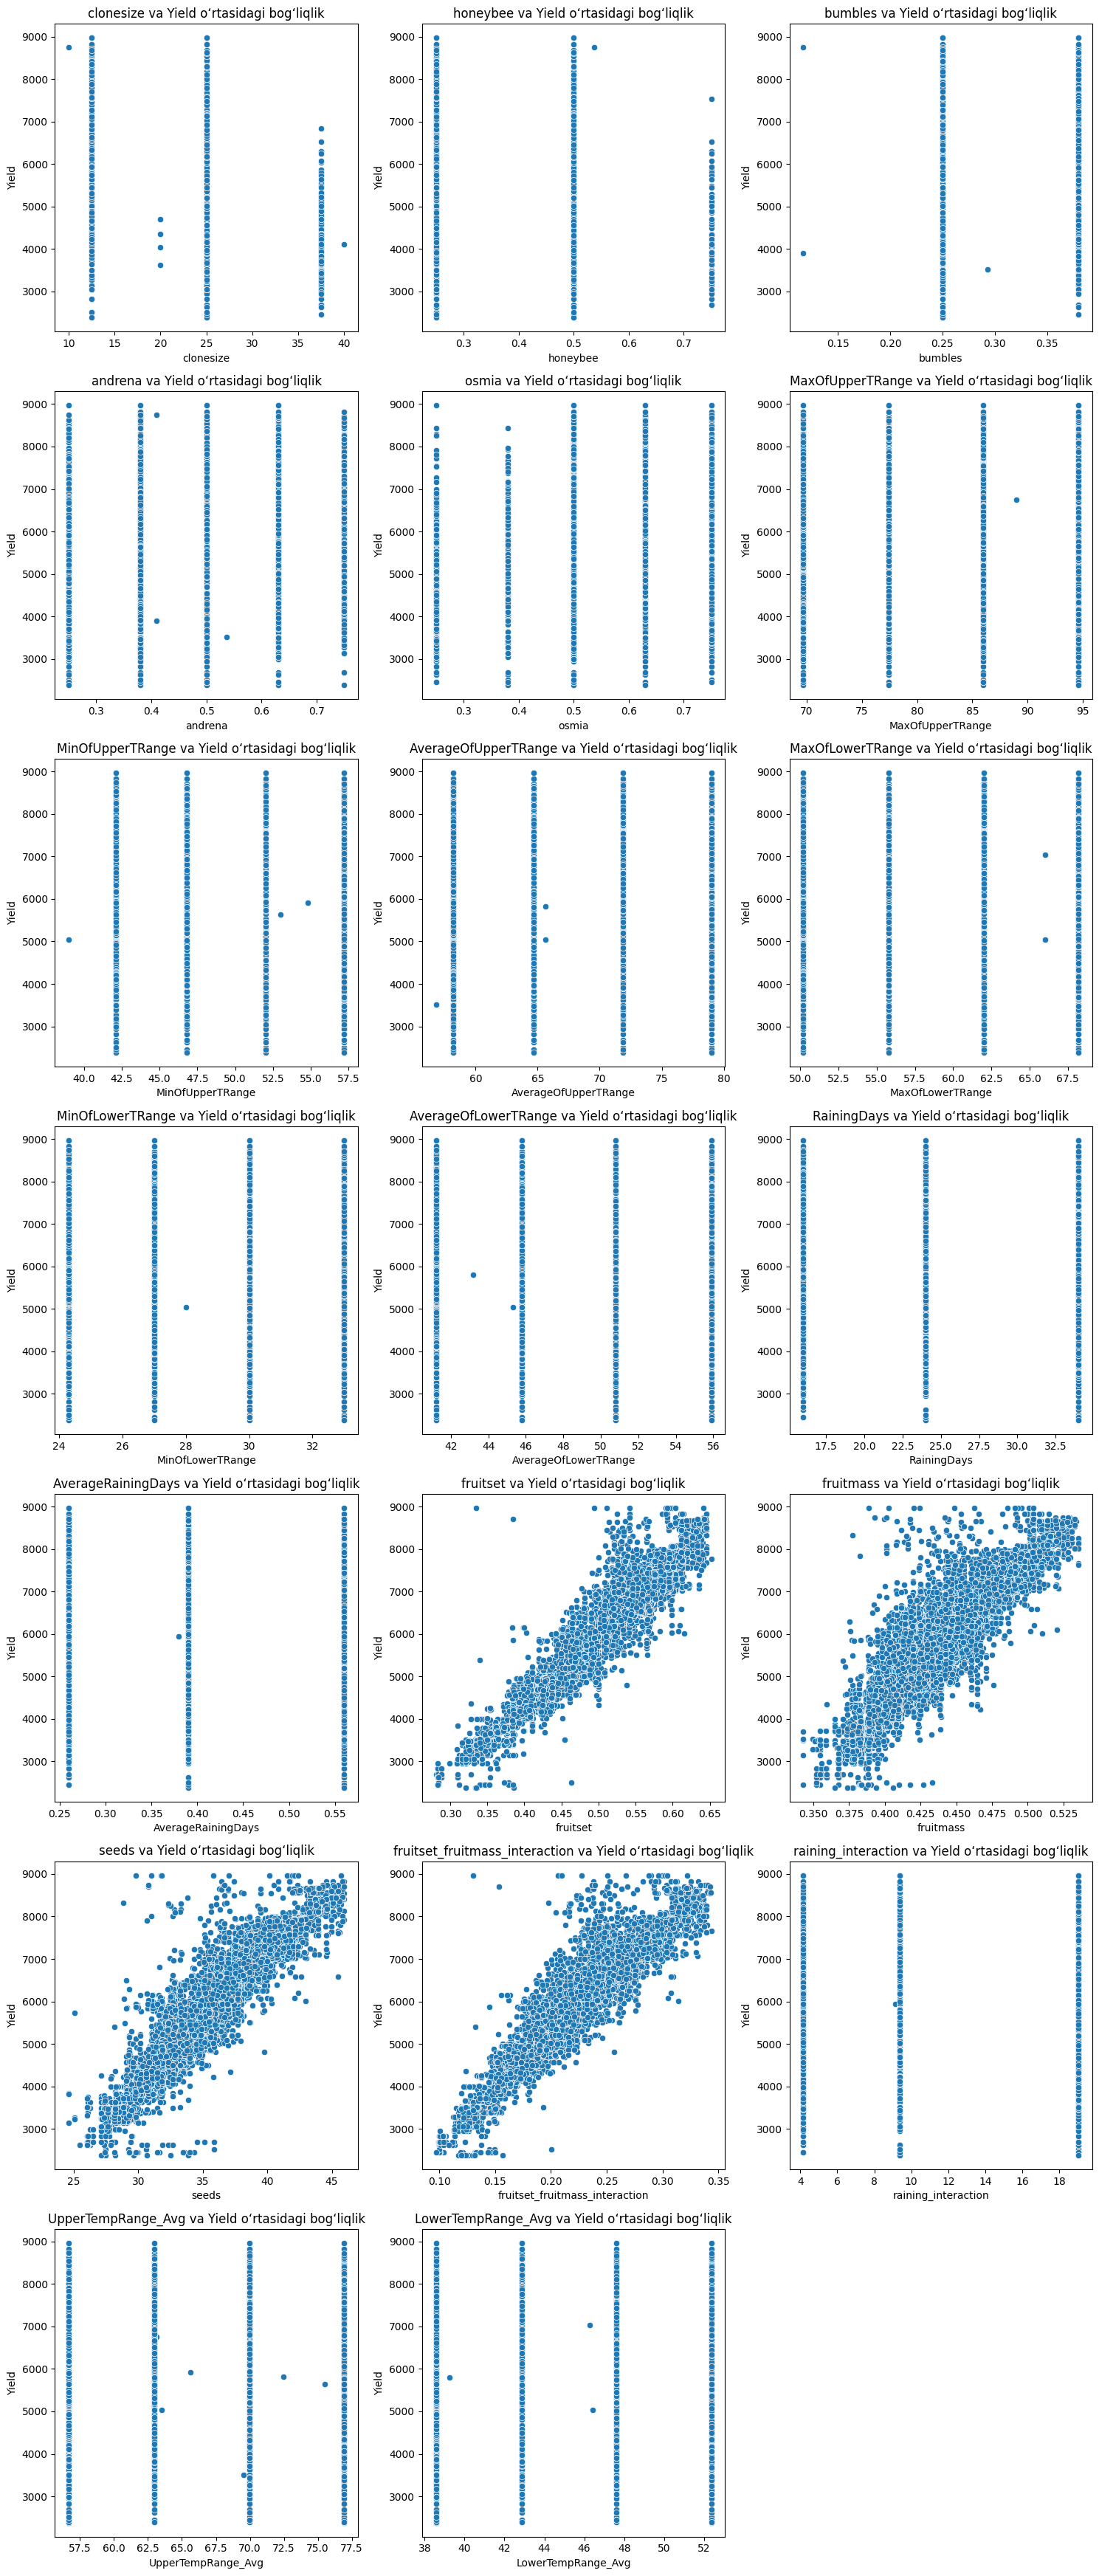

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'yield', 'id', 'Row#' ni chiqarib tashlash
features = df.columns.drop(['yield', 'id', 'Row#'])

# Sub-plotlar yaratish
n_features = len(features)
n_cols = 3  # 3 ustunli sub-plotlar
n_rows = (n_features // n_cols) + (n_features % n_cols != 0)  # qatorlar soni

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Agar qatorlar va ustunlar soni mos bo'lmasa, bo'sh plotlar qoldirilmang
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['yield'], ax=axes[i])
    axes[i].set_title(f'{feature} va Yield o‘rtasidagi bog‘liqlik')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Yield')

# Agar bo'sh plotlar qoldirilgan bo'lsa, ularni yashirish
for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()  # Plotsni joylashtirish
plt.show()


In [ ]:
# import optuna
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import StackingRegressor, RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from feature_engine.imputation import ArbitraryNumberImputer
# from feature_engine.encoding import OneHotEncoder
# from feature_engine.selection import DropCorrelatedFeatures

# # Ma'lumotlarni o'qish
# df = pd.read_csv('train.csv')  # Fayl manzilini moslashtiring

# # Maqsadli ustun 'yield'
# X = df.drop('yield', axis=1)
# y = df['yield']

# # Ma'lumotni ajratish
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocessing uchun pipeline
# numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
# categorical_features = X.select_dtypes(include=['object']).columns

# # Feature-engine bilan pre-processing
# numeric_transformer = Pipeline(steps=[
#     ('imputer', ArbitraryNumberImputer(arbitrary_number=-999)),  # Kategorik bo'lmagan qiymatlarni imputation qilish
#     ('scaler', StandardScaler())  # Raqamli ustunlarni normallashtirish
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Kategorik ustunlar uchun eng ko'p uchraydigan qiymat
#     ('encoder', OneHotEncoder(drop_last=True))  # Kategorik ustunlarni one-hot encoding qilish
# ])

# # Birlashtirilgan preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ]
# )

# # Feature-engine yordamida o'zgarishlar
# feature_selection = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('drop_corr', DropCorrelatedFeatures(correlation_threshold=0.95))  # Korrelyatsiya threshold bo'yicha o'zgartirish
# ])

# # Optuna optimallashtirish funksiyasini yaratish
# def objective(trial):
#     # Asosiy modellarni tanlash va parametrlarini kiritish
#     base_learners = [
#         ('rf', RandomForestRegressor(
#             n_estimators=trial.suggest_int('rf_n_estimators', 50, 200),
#             max_depth=trial.suggest_int('rf_max_depth', 5, 20),
#             random_state=42
#         )),
#         ('svr', SVR(
#             C=trial.suggest_loguniform('svr_C', 1e-3, 1e3),
#             epsilon=trial.suggest_uniform('svr_epsilon', 0.01, 0.1)
#         )),
#         ('lr', LinearRegression())
#     ]
    
#     # Meta-modelni tanlash
#     meta_model = LinearRegression()
    
#     # Stacking Regressor modelini yaratish
#     stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)
    
#     # Pipeline yaratish
#     model_pipeline = Pipeline(steps=[
#         ('feature_selection', feature_selection),
#         ('stacking', stacking_model)
#     ])
    
#     # Modelni o'qitish
#     model_pipeline.fit(X_train, y_train)
    
#     # Prognoz qilish
#     y_pred = model_pipeline.predict(X_test)
    
#     # Natijalarni baholash
#     mae = mean_absolute_error(y_test, y_pred)
    
#     return mae  # Optuna uchun maqsadli metrik

# # Optuna optimallashtirishni boshlash
# study = optuna.create_study(direction='minimize')  # 'minimize' - MAE ni minimallashtirish
# study.optimize(objective, n_trials=50)  # 50 ta sinov (trial) qilish

# # Eng yaxshi parametrlarni chiqarish
# print(f"Best parameters: {study.best_params}")
# print(f"Best MAE: {study.best_value}")
